=== Dataset Overview ===
Total games simulated: 16,000
Unique strategy pairs: 16

First 5 rows:
  Player1_Strategy Player2_Strategy  Player1_Score  Player2_Score   Winner  \
0              DQN              DQN             19             29  Player2   
1              DQN              DQN             27             21  Player1   
2              DQN              DQN             26             22  Player1   
3              DQN              DQN             19             29  Player2   
4              DQN              DQN             23             25  Player2   

   Moves  Time_Seconds  
0     42         0.006  
1     41         0.012  
2     47         0.007  
3     52         0.009  
4     40         0.011  

=== Basic Statistics ===
Average scores:
       Player1_Score  Player2_Score
count   16000.000000   16000.000000
mean       26.025188      21.974812
std         8.233691       8.233691
min         5.000000       5.000000
25%        19.000000      15.000000
50%        27.000000      2

<Figure size 1000x600 with 0 Axes>

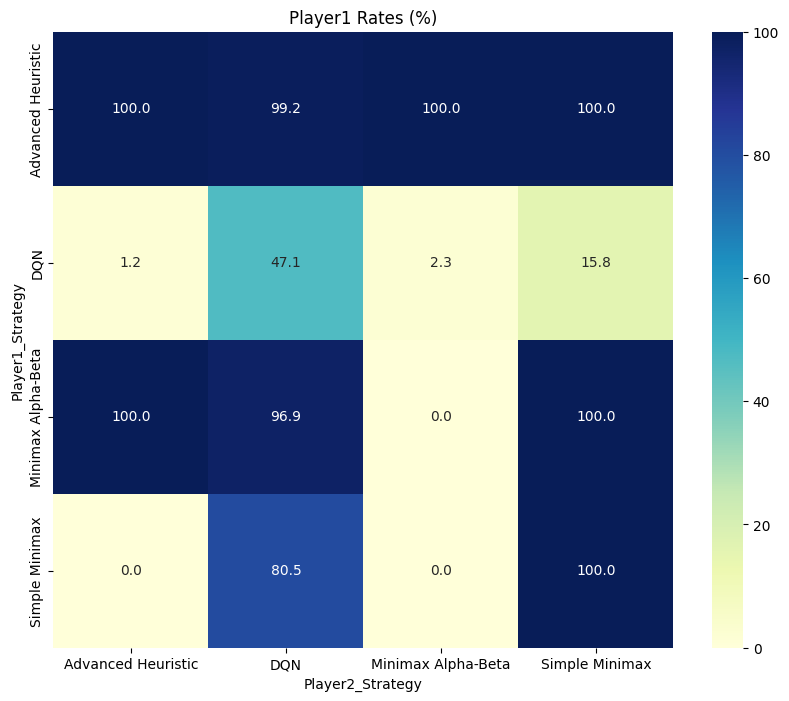

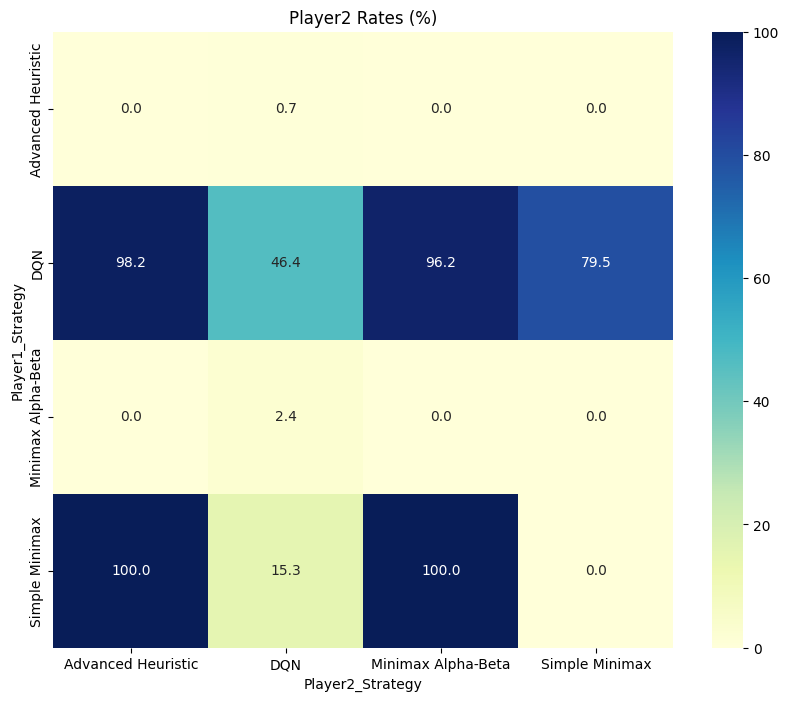

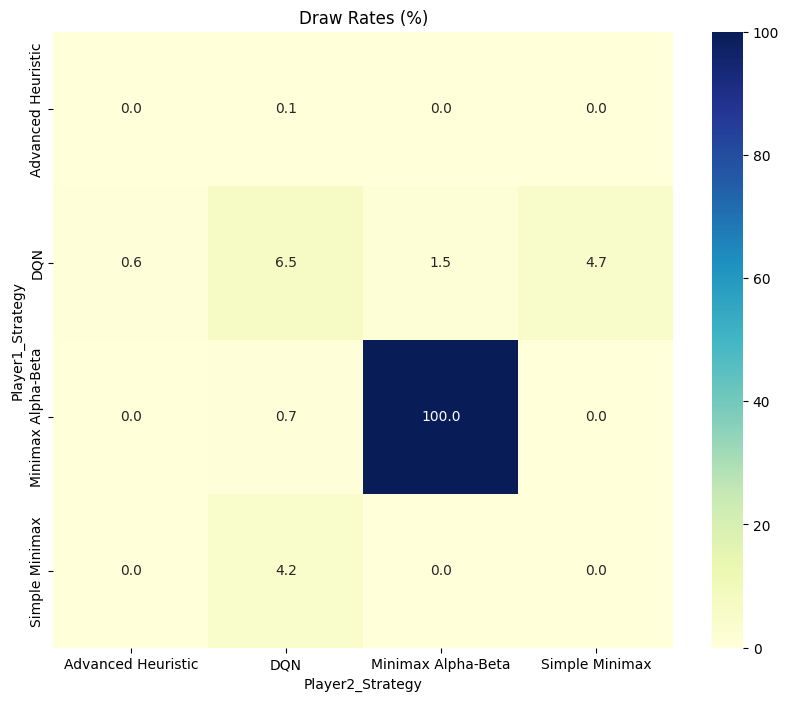

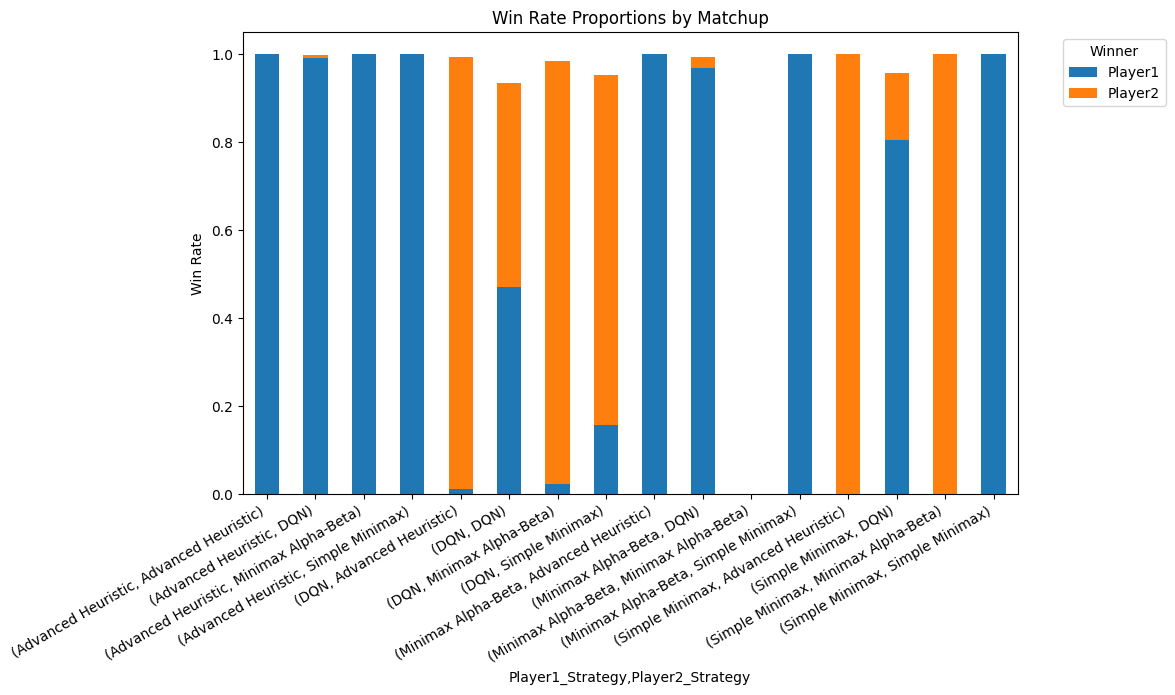

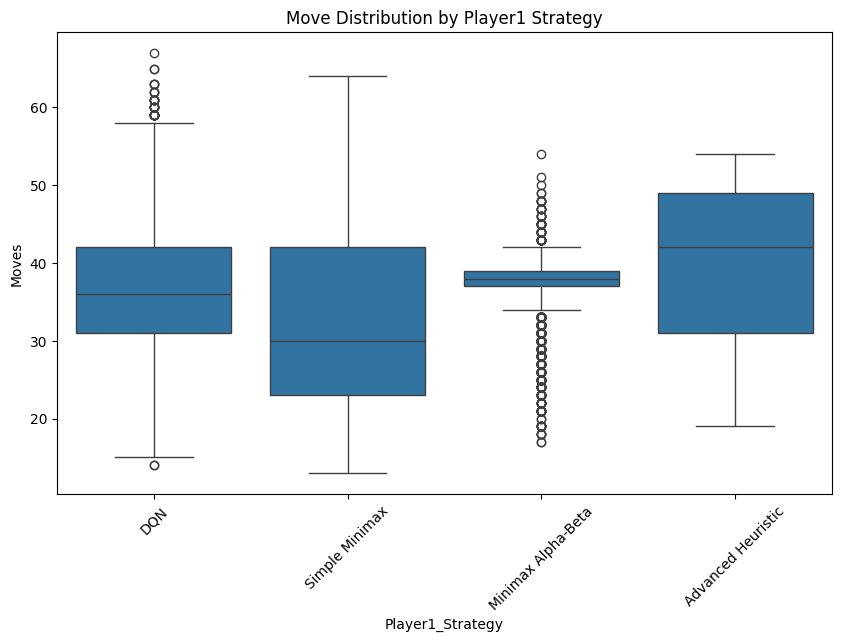

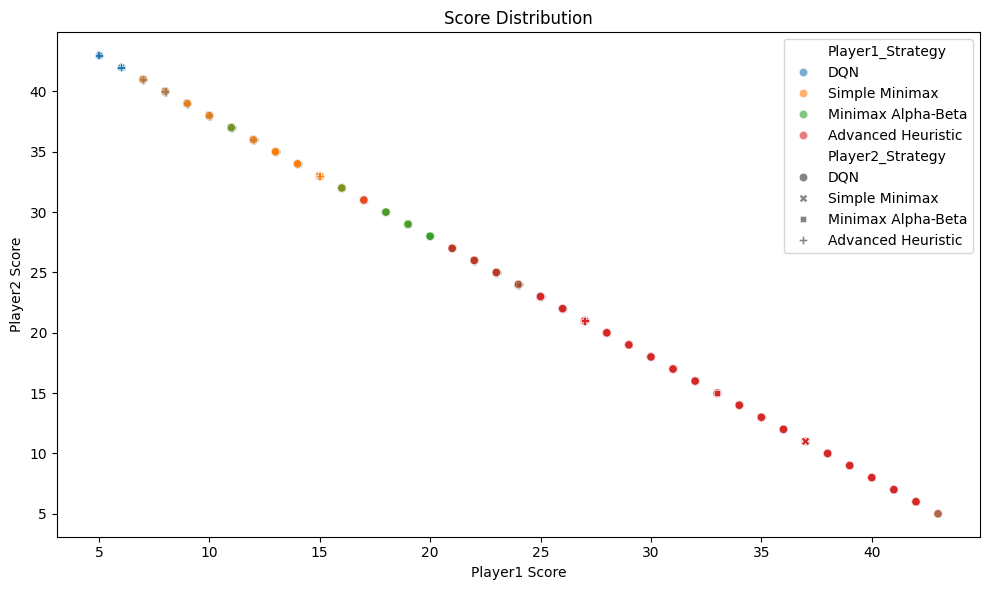

/tmp/ipykernel_2362582/2382414725.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


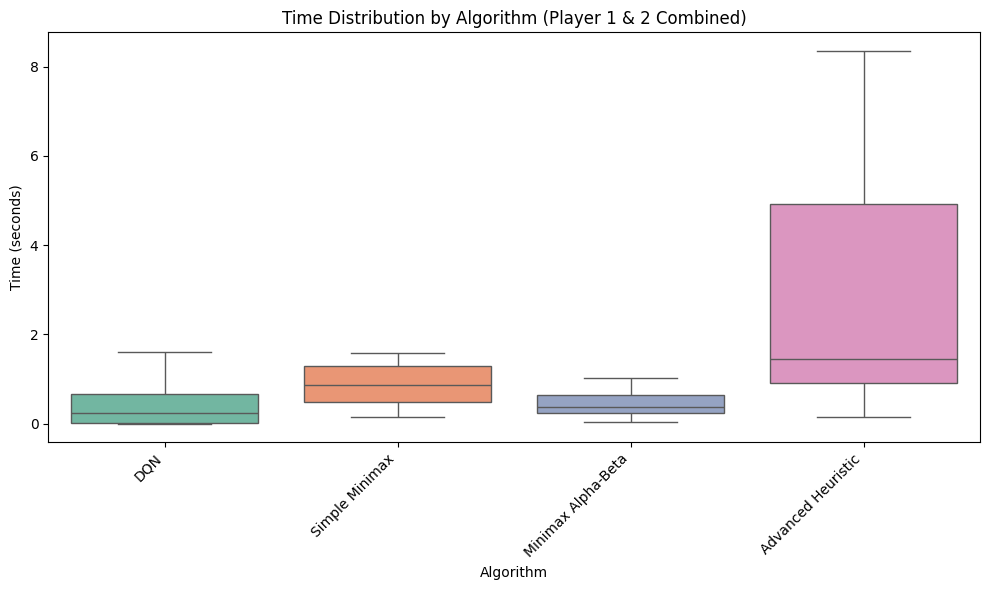


=== Advanced Metrics ===

Matchup Statistics:
                                       Avg_Score_Diff  Moves  Time_Seconds  \
Player1_Strategy   Player2_Strategy                                          
Advanced Heuristic Advanced Heuristic           6.000   49.0      5.009552   
                   DQN                         22.364   34.0      2.080328   
                   Minimax Alpha-Beta          18.000   42.0      5.171088   
                   Simple Minimax              26.000   31.0      1.206505   
DQN                Advanced Heuristic         -19.980   35.0      1.277125   
                   DQN                          0.370   40.0      0.005297   
                   Minimax Alpha-Beta         -18.904   35.0      0.123842   
                   Simple Minimax              -9.876   34.0      0.505962   
Minimax Alpha-Beta Advanced Heuristic           8.000   37.0      0.812408   
                   DQN                         20.610   33.0      0.136280   
                 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_results(csv_path):
    # Load the data
    df = pd.read_csv(csv_path)
    
    # Basic info
    print("=== Dataset Overview ===")
    print(f"Total games simulated: {len(df):,}")
    print(f"Unique strategy pairs: {df[['Player1_Strategy', 'Player2_Strategy']].drop_duplicates().shape[0]}")
    print("\nFirst 5 rows:")
    print(df.head())
    
    # Basic statistics
    print("\n=== Basic Statistics ===")
    print("Average scores:")
    print(df[['Player1_Score', 'Player2_Score']].describe())
    
    print("\nGame duration stats:")
    print(df[['Moves', 'Time_Seconds']].describe())
    
    # Win rate analysis
    print("\n=== Win Rate Analysis ===")
    
    # Overall win rates
    overall_win_rates = df['Winner'].value_counts(normalize=True)
    print(f"\nOverall Win Rates:\n{overall_win_rates}")
    
    # Win rates by strategy pair
    strategy_win_rates = df.groupby(['Player1_Strategy', 'Player2_Strategy'])['Winner'] \
                         .value_counts(normalize=True) \
                         .unstack() \
                         .fillna(0)
    
    print("\nWin Rates by Strategy Matchup:")
    print(strategy_win_rates)
    
    # Visualization
    plt.figure(figsize=(10, 6))
    
    # Heatmap of Player1 win rates
    print("\nGenerating visualizations...")
    # Create a pivot table with all outcomes
    outcome_pivot = df.groupby(
        ['Player1_Strategy', 'Player2_Strategy', 'Winner']
    ).size().unstack().fillna(0)

    # Calculate percentages
    outcome_pivot = outcome_pivot.div(outcome_pivot.sum(axis=1), axis=0) * 100

    # Plot for each outcome
    for outcome in ['Player1', 'Player2', 'Draw']:
        plt.figure(figsize=(10, 8))
        sns.heatmap(outcome_pivot[outcome].unstack(), 
                    annot=True, fmt=".1f", 
                    cmap='YlGnBu', 
                    vmin=0, vmax=100)
        plt.title(f'{outcome} Rates (%)')
        plt.show()
    
    # Win rate comparison
    plt.figure(figsize=(10, 6))
    strategy_win_rates = df.groupby(['Player1_Strategy', 'Player2_Strategy'])['Winner'] \
        .value_counts(normalize=True) \
        .unstack() \
        .fillna(0)
    strategy_win_rates[['Player1', 'Player2']].plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title('Win Rate Proportions by Matchup')
    plt.ylabel('Win Rate')
    plt.xticks(rotation=30, ha="right")
    plt.legend(title="Winner", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Move distribution
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Player1_Strategy', y='Moves', data=df)
    plt.title('Move Distribution by Player1 Strategy')
    plt.xticks(rotation=45)
    
    # Score comparison
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Player1_Score', y='Player2_Score', 
                    hue='Player1_Strategy', style='Player2_Strategy',
                    data=df, alpha=0.6)
    plt.title('Score Distribution')
    plt.xlabel('Player1 Score')
    plt.ylabel('Player2 Score')
    
    plt.tight_layout()
    plt.savefig('mancala_analysis.png')
    plt.show()
    
    # Add this in the visualization section after the score comparison plot
    plt.figure(figsize=(10, 6))

    # First create a combined DataFrame with all algorithms and their times
    algo_times = pd.concat([
        df[['Player1_Strategy', 'Time_Seconds']].rename(columns={'Player1_Strategy': 'Algorithm'}),
        df[['Player2_Strategy', 'Time_Seconds']].rename(columns={'Player2_Strategy': 'Algorithm'})
    ])

    sns.boxplot(
        x='Algorithm',
        y='Time_Seconds',
        data=algo_times,
        order=algo_times['Algorithm'].value_counts().index,  # Order by frequency
        palette='Set2',
        showfliers=False
    )

    plt.title('Time Distribution by Algorithm (Player 1 & 2 Combined)')
    plt.xlabel('Algorithm')
    plt.ylabel('Time (seconds)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Advanced metrics
    print("\n=== Advanced Metrics ===")
    df['Score_Difference'] = df['Player1_Score'] - df['Player2_Score']
    
    matchup_stats = df.groupby(['Player1_Strategy', 'Player2_Strategy']).agg({
        'Score_Difference': 'mean',
        'Moves': 'median',
        'Time_Seconds': 'mean',
        'Winner': lambda x: (x == 'Player1').mean()
    }).rename(columns={
        'Score_Difference': 'Avg_Score_Diff',
        'Winner': 'Player1_Win_Rate'
    })
    
    print("\nMatchup Statistics:")
    print(matchup_stats)
    

if __name__ == "__main__":
    csv_file = "mancala_simulation_results_2000.csv"
    analyze_results(csv_file)